In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [178]:
customer_df = pd.read_csv("customer_profiles.csv")
ad_events = pd.read_csv("ad_events.csv")
ad_details = pd.read_csv("ad_details.csv")
customer_df.head()

,gender,age,id,became_member_on (year month day),income,ever_married,kids,home_state
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,No,3,North Dakota
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Yes,0,Florida
2,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,Yes,3,Florida
3,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,Yes,5,Missouri
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,Yes,5,South Dakota


<Axes: xlabel='age', ylabel='income'>

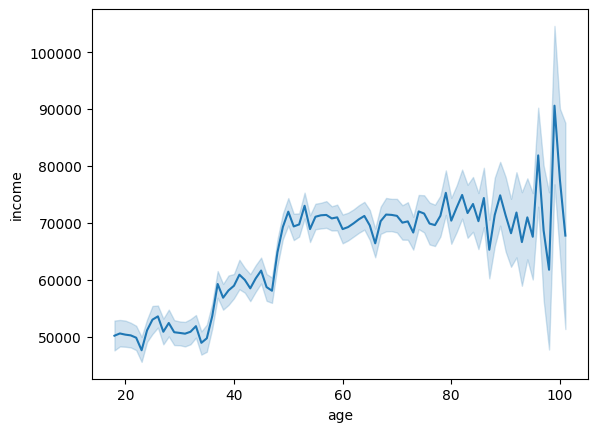

In [177]:
sns.scatterplot(data=customer_df, x="age", y="income", hue="gender")

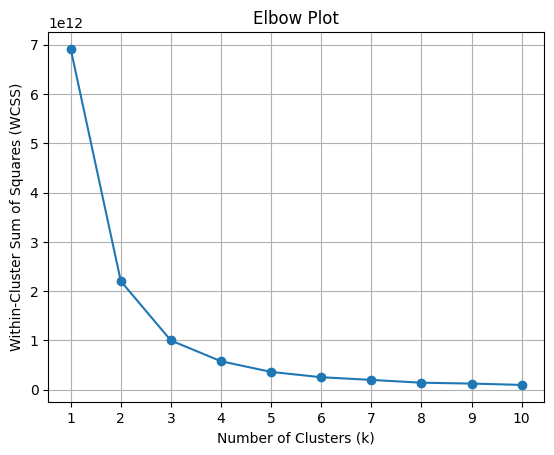

In [171]:
data = customer_df[['age', 'income']].values

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

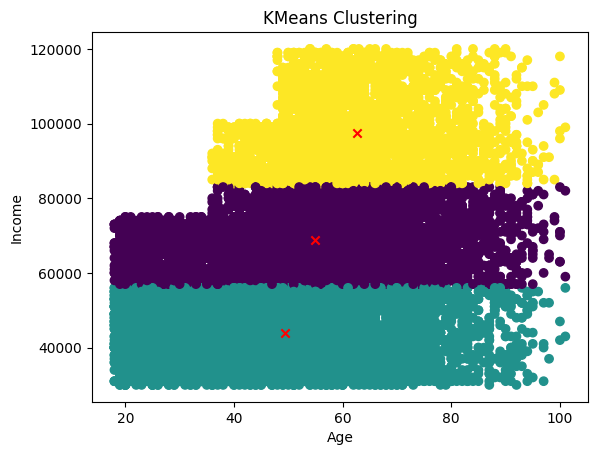

In [172]:
data = customer_df[['age', 'income']].values

# Instantiate KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model
kmeans.fit(data)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Get cluster assignments for each data point
labels = kmeans.predict(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('KMeans Clustering')
plt.show()

In [173]:
customer_df.describe()

,age,became_member_on (year month day),income,kids
count,14825.000000,1.482500e+04,14825.000000,14825.000000
mean,54.393524,2.016689e+07,65404.991568,1.690793
std,17.383705,1.188565e+04,21598.299410,1.475529
min,18.000000,2.013073e+07,30000.000000,0.000000
25%,42.000000,2.016052e+07,49000.000000,0.000000
50%,55.000000,2.017080e+07,64000.000000,2.000000
75%,66.000000,2.017123e+07,80000.000000,3.000000
max,101.000000,2.018073e+07,120000.000000,5.000000
